In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, mean_absolute_error, max_error
from yellowbrick.regressor import ResidualsPlot, residuals_plot, prediction_error

In [24]:
data = pd.read_csv("/content/drive/MyDrive/AI datasets/Therapy riser dose rates.csv")

encoder = LabelEncoder()
data['WKDY'] = encoder.fit_transform(data['WKDY'])

X = data.drop(["1F dose rate"], 1)
y = data["1F dose rate"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, shuffle = False)

X_sc = RobustScaler()
X_train = pd.DataFrame(X_sc.fit_transform(X_train))
X_test = pd.DataFrame(X_sc.transform(X_test))

model_comp={}
fit_comp={}

<ipython-input-24-32100f925f7f>:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = data.drop(["1F dose rate"], 1)


RMSE = 1.1876591410853037
MAE = 0.9735168286319159
MAPE = 0.39017955565263895
Max error = 3.9106810884321286



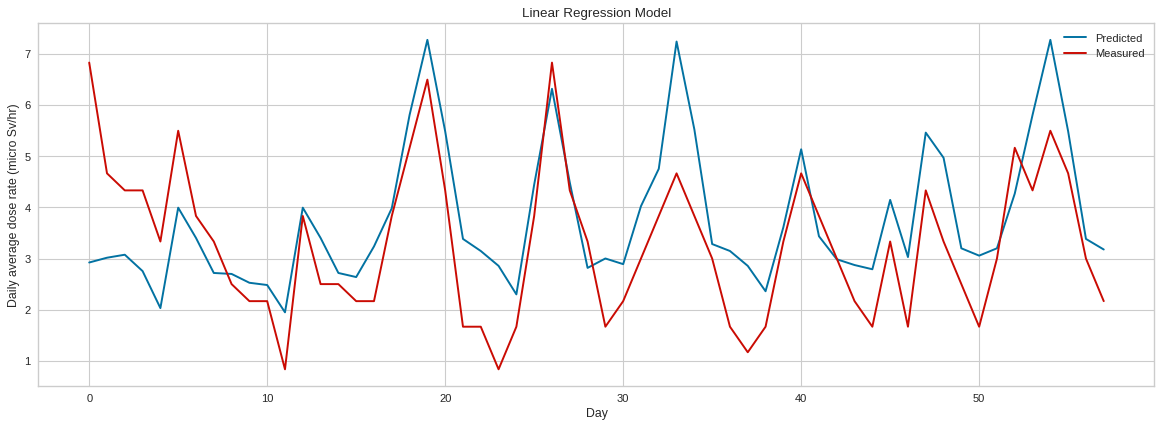

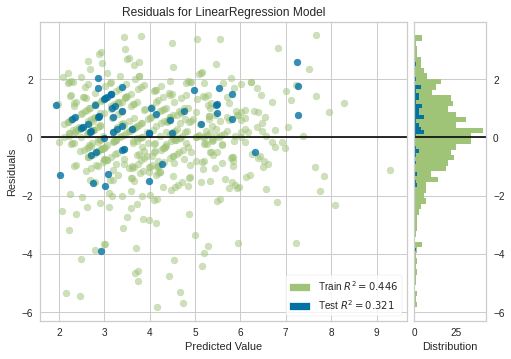

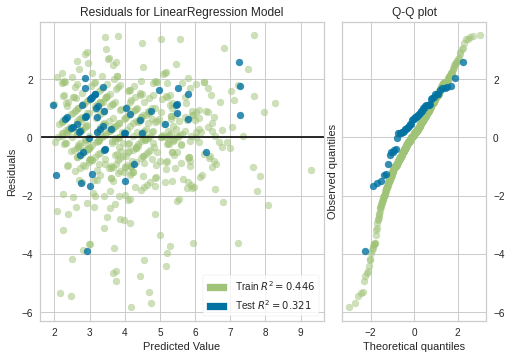

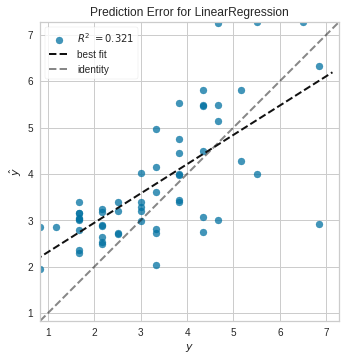

In [25]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()
LR.fit(X_train, y_train)
y_pred_LR = LR.predict(X_test)

LR_RMSE = np.math.sqrt(mean_squared_error(y_test, y_pred_LR))
LR_MAE = mean_absolute_error(y_test, y_pred_LR)
LR_MAPE = mean_absolute_percentage_error(y_test, y_pred_LR)
LR_ME = max_error(y_test, y_pred_LR)
print("RMSE = " + str(LR_RMSE))
print("MAE = " + str(LR_MAE))
print("MAPE = " + str(LR_MAPE))
print("Max error = " + str(LR_ME))
print("")

figure(figsize=(18, 6), dpi=80)
plt.title(label="Linear Regression Model")
plt.xlabel("Day")
plt.ylabel("Daily average dose rate (micro Sv/hr)")
plt.plot(range(0,y_pred_LR.size), y_pred_LR, color='b', label="Predicted") 
plt.plot(range(0,y_test.size), y_test, color='r', label="Measured")
plt.legend(loc="upper right")
plt.show()
print("")

LR_res_plt = ResidualsPlot(LR, train_alpha=0.5, test_alpha=0.8, 
                         train_color="g", test_color="b", is_fitted =True)
LR_res_plt.fit(X_train, y_train)
LR_res_plt.score(X_test, y_test)
LR_res_plt.show()
LR_train_r2score = LR_res_plt.train_score_
LR_test_r2score = LR_res_plt.test_score_
LR_r2score_diff = LR_train_r2score-LR_test_r2score

print("")

LR_QQ_plt = ResidualsPlot(LR, train_alpha=0.5, test_alpha=0.8, 
                         train_color="g", test_color="b", is_fitted =True, hist=False, qqplot=True)
LR_QQ_plt.fit(X_train, y_train)
LR_QQ_plt.score(X_test, y_test)
LR_QQ_plt.show()

print("")

LR_error_plt = prediction_error(LR, X_train, y_train, X_test, y_test, is_fitted =True)

fit_comp['LR']=[LR_train_r2score, LR_test_r2score, LR_r2score_diff]

model_comp['LR']=[LR_RMSE, LR_MAE, LR_MAPE, LR_ME]

RMSE = 1.3117907679665755
MAE = 1.0247126436103449
MAPE = 0.45430964310793476
Max error = 4.0833333332



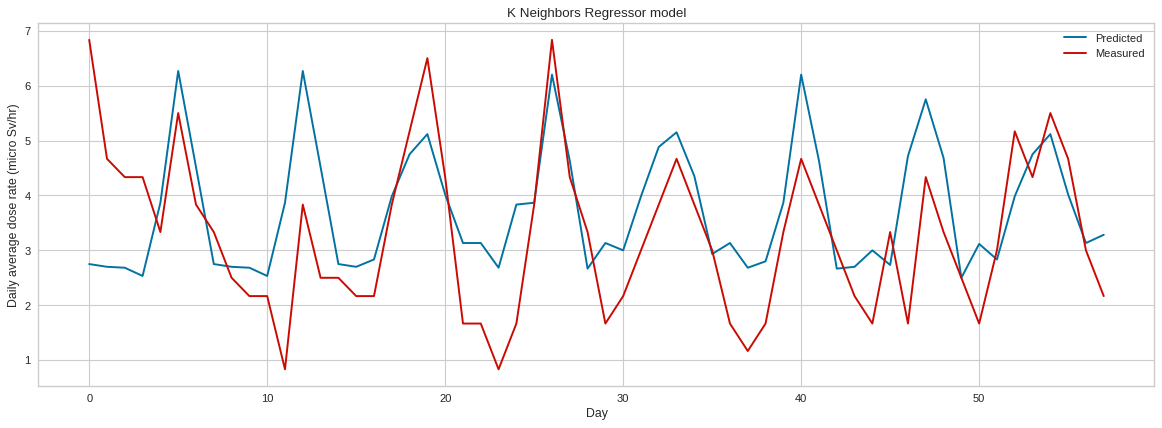

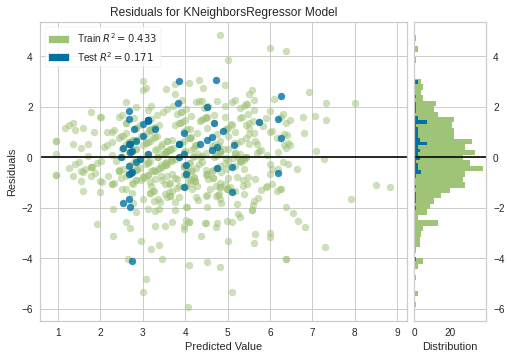

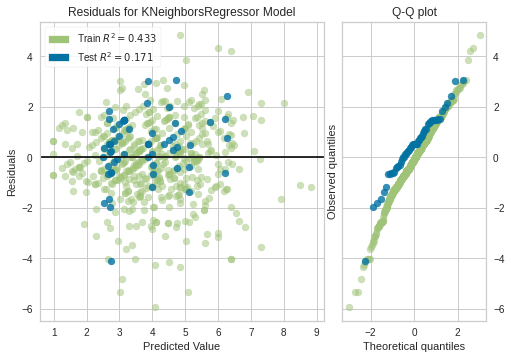

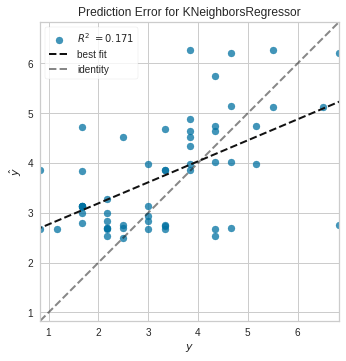

In [26]:
from sklearn.neighbors import KNeighborsRegressor

KNN = KNeighborsRegressor()
KNN.fit(X_train, y_train)
y_pred_KNN = KNN.predict(X_test)

KNN_RMSE = np.math.sqrt(mean_squared_error(y_test, y_pred_KNN))
KNN_MAE = mean_absolute_error(y_test, y_pred_KNN)
KNN_MAPE = mean_absolute_percentage_error(y_test, y_pred_KNN)
KNN_ME = max_error(y_test, y_pred_KNN)
print("RMSE = " + str(KNN_RMSE))
print("MAE = " + str(KNN_MAE))
print("MAPE = " + str(KNN_MAPE))
print("Max error = " + str(KNN_ME))
print("")

figure(figsize=(18, 6), dpi=80)
plt.title(label="K Neighbors Regressor model")
plt.xlabel("Day")
plt.ylabel("Daily average dose rate (micro Sv/hr)")
plt.plot(range(0,y_pred_KNN.size), y_pred_KNN, color='b', label="Predicted") 
plt.plot(range(0,y_test.size), y_test, color='r', label="Measured")
plt.legend(loc="upper right")
plt.show()
print("")

KNN_res_plt = ResidualsPlot(KNN, train_alpha=0.5, test_alpha=0.8, 
                         train_color="g", test_color="b", is_fitted =True)
KNN_res_plt.fit(X_train, y_train)
KNN_res_plt.score(X_test, y_test)
KNN_res_plt.show()
KNN_train_r2score = KNN_res_plt.train_score_
KNN_test_r2score = KNN_res_plt.test_score_
KNN_r2score_diff = KNN_train_r2score-KNN_test_r2score

print("")

KNN_QQ_plt = ResidualsPlot(KNN, train_alpha=0.5, test_alpha=0.8, 
                         train_color="g", test_color="b", is_fitted =True, hist=False, qqplot=True)
KNN_QQ_plt.fit(X_train, y_train)
KNN_QQ_plt.score(X_test, y_test)
KNN_QQ_plt.show()

print("")

KNN_error_plt = prediction_error(KNN, X_train, y_train, X_test, y_test, is_fitted =True)

fit_comp['KNN']=[KNN_train_r2score, KNN_test_r2score, KNN_r2score_diff]

model_comp['KNN']=[KNN_RMSE, KNN_MAE, KNN_MAPE, KNN_ME]

RMSE = 1.8975209849498111
MAE = 1.5244699763646268
MAPE = 0.5892396900542846
Max error = 4.333333333



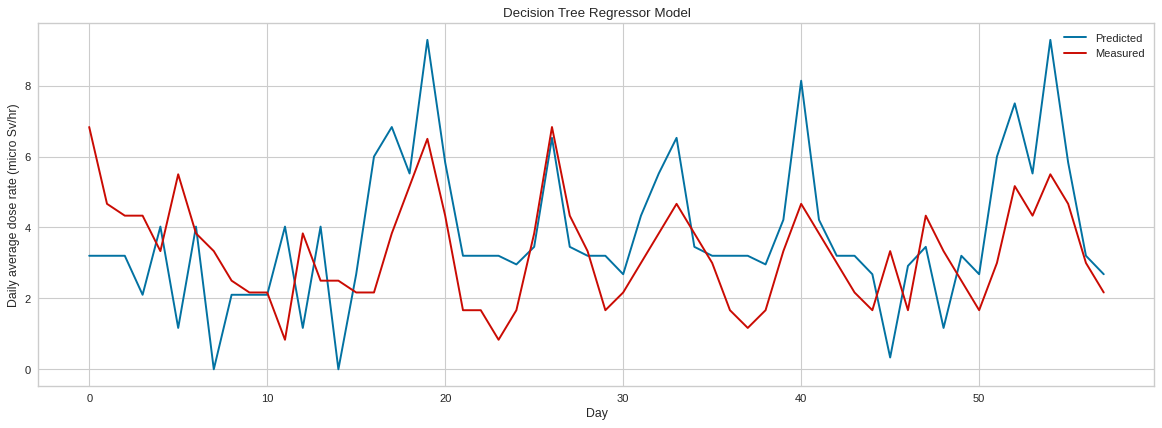

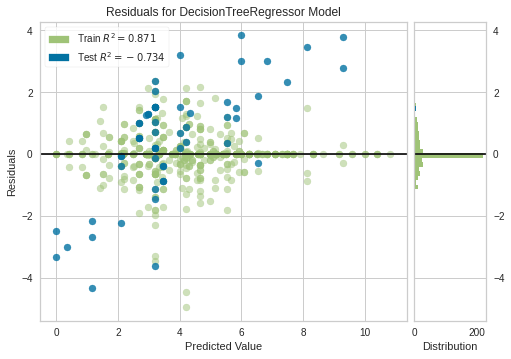

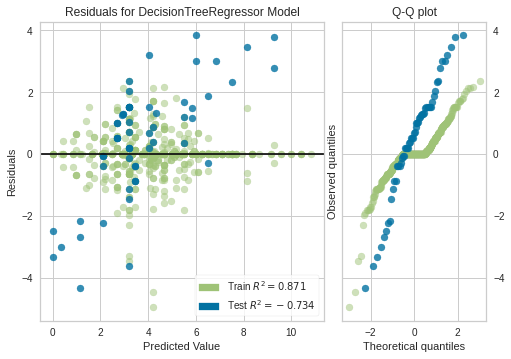

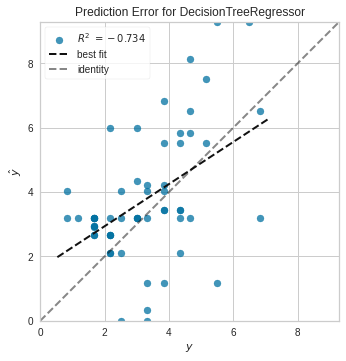

In [27]:
from sklearn.tree import DecisionTreeRegressor

DT = DecisionTreeRegressor(max_depth = 10, random_state=0)
DT.fit(X_train, y_train)
y_pred_DT = DT.predict(X_test)

DT_RMSE = np.math.sqrt(mean_squared_error(y_test, y_pred_DT))
DT_MAE = mean_absolute_error(y_test, y_pred_DT)
DT_MAPE = mean_absolute_percentage_error(y_test, y_pred_DT)
DT_ME = max_error(y_test, y_pred_DT)
print("RMSE = " + str(DT_RMSE))
print("MAE = " + str(DT_MAE))
print("MAPE = " + str(DT_MAPE))
print("Max error = " + str(DT_ME))
print("")

figure(figsize=(18, 6), dpi=80)
plt.title(label="Decision Tree Regressor Model")
plt.xlabel("Day")
plt.ylabel("Daily average dose rate (micro Sv/hr)")
plt.plot(range(0,y_pred_DT.size), y_pred_DT, color='b', label="Predicted") 
plt.plot(range(0,y_test.size), y_test, color='r', label="Measured")
plt.legend(loc="upper right")
plt.show()
print("")

DT_res_plt = ResidualsPlot(DT, train_alpha=0.5, test_alpha=0.8, 
                         train_color="g", test_color="b", is_fitted =True)
DT_res_plt.fit(X_train, y_train)
DT_res_plt.score(X_test, y_test)
DT_res_plt.show()
DT_train_r2score = DT_res_plt.train_score_
DT_test_r2score = DT_res_plt.test_score_
DT_r2score_diff = DT_train_r2score-DT_test_r2score

print("")

DT_QQ_plt = ResidualsPlot(DT, train_alpha=0.5, test_alpha=0.8, 
                         train_color="g", test_color="b", is_fitted =True, hist=False, qqplot=True)
DT_QQ_plt.fit(X_train, y_train)
DT_QQ_plt.score(X_test, y_test)
DT_QQ_plt.show()

print("")

DT_error_plt = prediction_error(DT, X_train, y_train, X_test, y_test, is_fitted =True)

fit_comp['DT']=[DT_train_r2score, DT_test_r2score, DT_r2score_diff]

model_comp['DT']=[DT_RMSE, DT_MAE, DT_MAPE, DT_ME]

RMSE = 1.3116416236916526
MAE = 1.0748473918825334
MAPE = 0.44704552370717326
Max error = 3.8243686320618



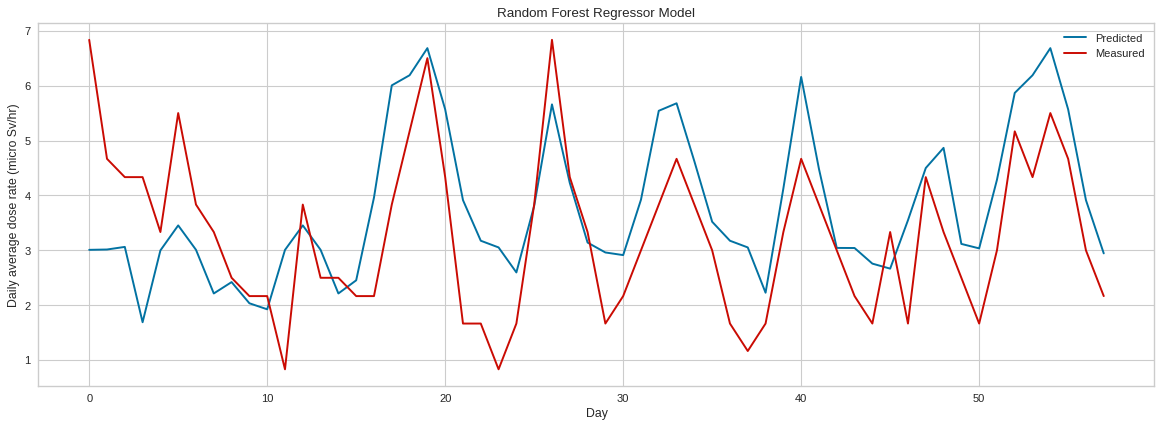

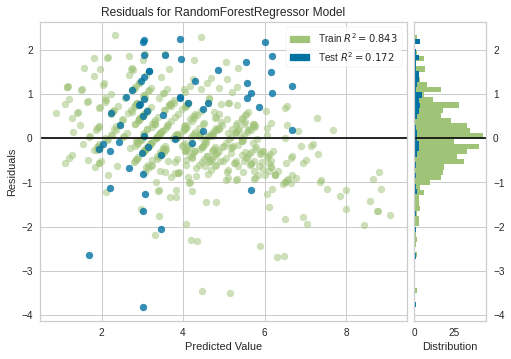

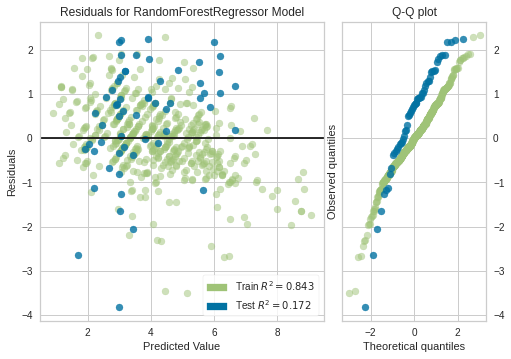

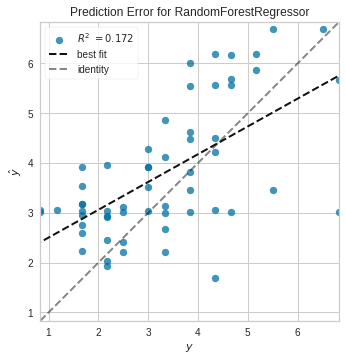

In [28]:
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor(max_depth = 10, random_state=0)
RF.fit(X_train, y_train)
y_pred_RF = RF.predict(X_test)

RF_RMSE = np.math.sqrt(mean_squared_error(y_test, y_pred_RF))
RF_MAE = mean_absolute_error(y_test, y_pred_RF)
RF_MAPE = mean_absolute_percentage_error(y_test, y_pred_RF)
RF_ME = max_error(y_test, y_pred_RF)
print("RMSE = " + str(RF_RMSE))
print("MAE = " + str(RF_MAE))
print("MAPE = " + str(RF_MAPE))
print("Max error = " + str(RF_ME))
print("")

figure(figsize=(18, 6), dpi=80)
plt.title(label="Random Forest Regressor Model")
plt.xlabel("Day")
plt.ylabel("Daily average dose rate (micro Sv/hr)")
plt.plot(range(0,y_pred_RF.size), y_pred_RF, color='b', label="Predicted") 
plt.plot(range(0,y_test.size), y_test, color='r', label="Measured")
plt.legend(loc="upper right")
plt.show()
print("")

RF_res_plt = ResidualsPlot(RF, train_alpha=0.5, test_alpha=0.8, 
                         train_color="g", test_color="b", is_fitted =True)
RF_res_plt.fit(X_train, y_train)
RF_res_plt.score(X_test, y_test)
RF_res_plt.show()
RF_train_r2score = RF_res_plt.train_score_
RF_test_r2score = RF_res_plt.test_score_
RF_r2score_diff = RF_train_r2score-RF_test_r2score

print("")

RF_QQ_plt = ResidualsPlot(RF, train_alpha=0.5, test_alpha=0.8, 
                         train_color="g", test_color="b", is_fitted =True, hist=False, qqplot=True)
RF_QQ_plt.fit(X_train, y_train)
RF_QQ_plt.score(X_test, y_test)
RF_QQ_plt.show()

print("")

RF_error_plt = prediction_error(RF, X_train, y_train, X_test, y_test, is_fitted =True)

fit_comp['RF']=[RF_train_r2score, RF_test_r2score, RF_r2score_diff]
model_comp['RF']=[RF_RMSE, RF_MAE, RF_MAPE, RF_ME]

RMSE = 1.1058333050844324
MAE = 0.8735164862763847
MAPE = 0.35527092389062936
Max error = 3.2659676644580236



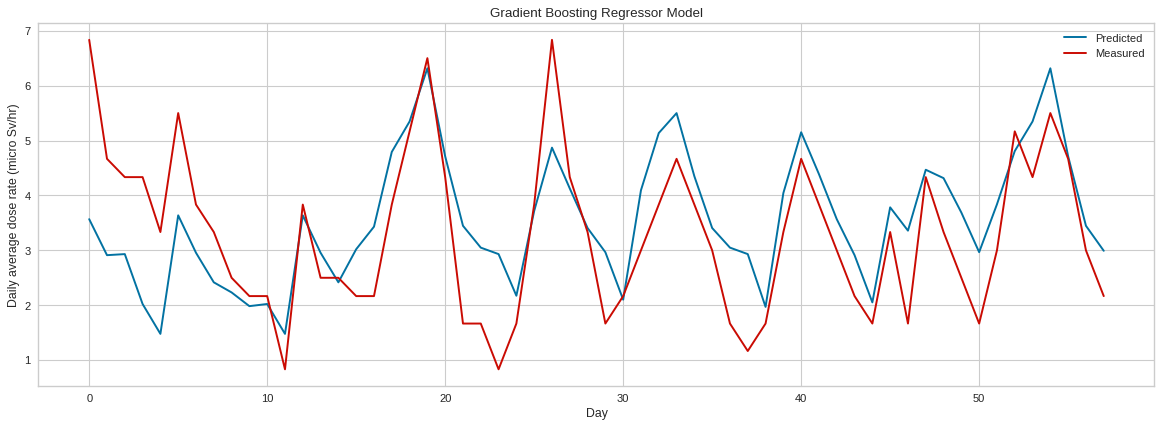

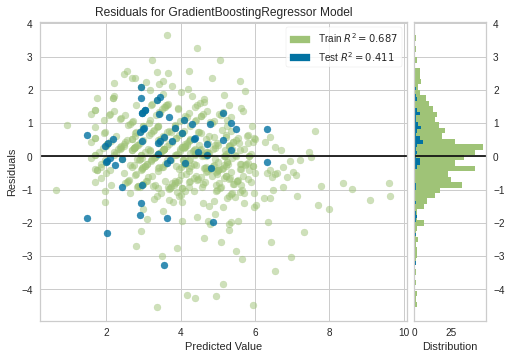

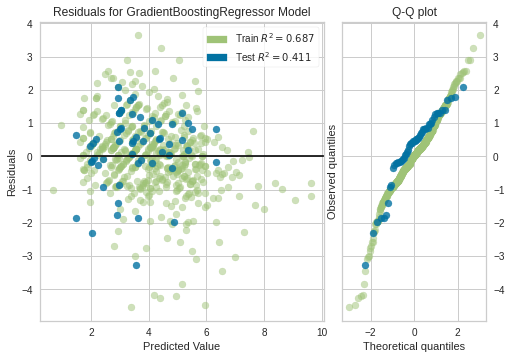

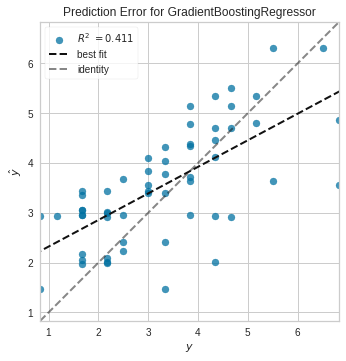

In [29]:
from sklearn.ensemble import GradientBoostingRegressor

GBR = GradientBoostingRegressor(n_iter_no_change = 10, random_state=0)
GBR.fit(X_train, y_train)
y_pred_GBR = GBR.predict(X_test)

GBR_RMSE = np.math.sqrt(mean_squared_error(y_test, y_pred_GBR))
GBR_MAE = mean_absolute_error(y_test, y_pred_GBR)
GBR_MAPE = mean_absolute_percentage_error(y_test, y_pred_GBR)
GBR_ME = max_error(y_test, y_pred_GBR)
print("RMSE = " + str(GBR_RMSE))
print("MAE = " + str(GBR_MAE))
print("MAPE = " + str(GBR_MAPE))
print("Max error = " + str(GBR_ME))
print("")

figure(figsize=(18, 6), dpi=80)
plt.title(label="Gradient Boosting Regressor Model")
plt.xlabel("Day")
plt.ylabel("Daily average dose rate (micro Sv/hr)")
plt.plot(range(0,y_pred_GBR.size), y_pred_GBR, color='b', label="Predicted") 
plt.plot(range(0,y_test.size), y_test, color='r', label="Measured")
plt.legend(loc="upper right")
plt.show()
print("")

GBR_res_plt = ResidualsPlot(GBR, train_alpha=0.5, test_alpha=0.8, 
                         train_color="g", test_color="b", is_fitted =True)
GBR_res_plt.fit(X_train, y_train)
GBR_res_plt.score(X_test, y_test)
GBR_res_plt.show()
GBR_train_r2score = GBR_res_plt.train_score_
GBR_test_r2score = GBR_res_plt.test_score_
GBR_r2score_diff = GBR_train_r2score-GBR_test_r2score

print("")

GBR_QQ_plt = ResidualsPlot(GBR, train_alpha=0.5, test_alpha=0.8, 
                         train_color="g", test_color="b", is_fitted =True, hist=False, qqplot=True)
GBR_QQ_plt.fit(X_train, y_train)
GBR_QQ_plt.score(X_test, y_test)
GBR_QQ_plt.show()

print("")

GBR_error_plt = prediction_error(GBR, X_train, y_train, X_test, y_test, is_fitted =True)

fit_comp['GBR']=[GBR_train_r2score, GBR_test_r2score, GBR_r2score_diff]

model_comp['GBR']=[GBR_RMSE, GBR_MAE, GBR_MAPE, GBR_ME]

RMSE = 1.2598824482946511
MAE = 1.0075318751313282
MAPE = 0.48175290957168027
Max error = 3.4497740171979885



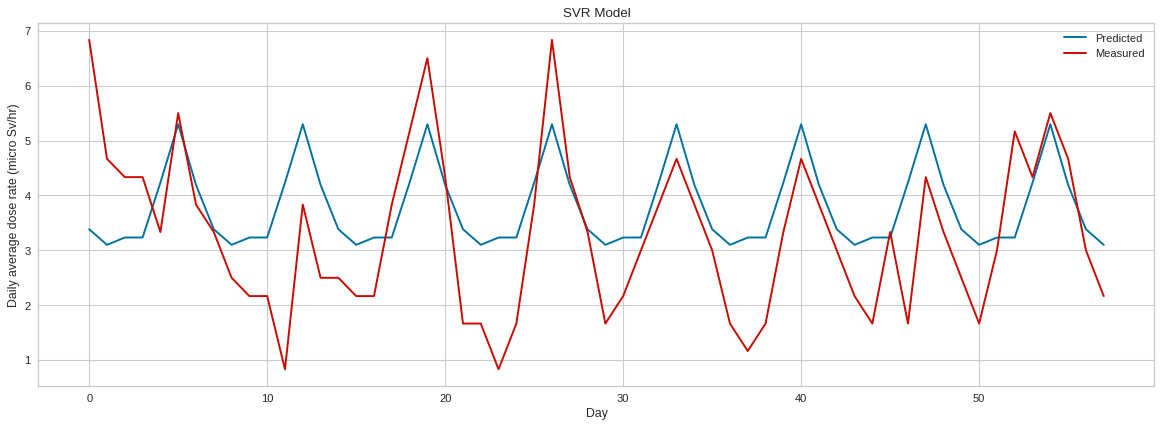

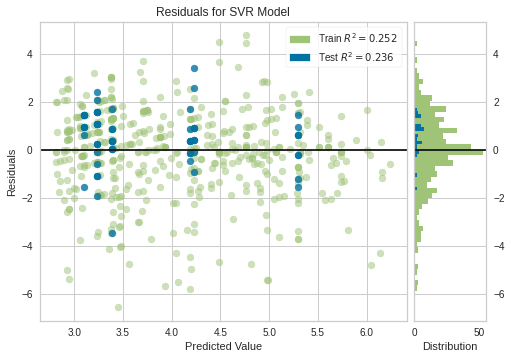

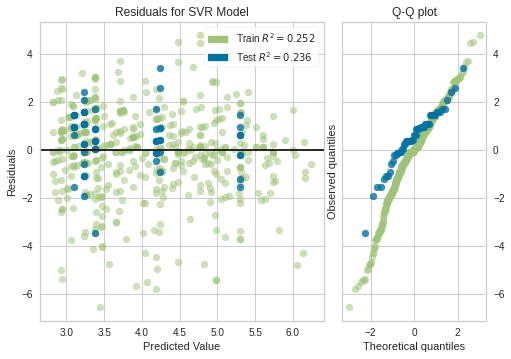

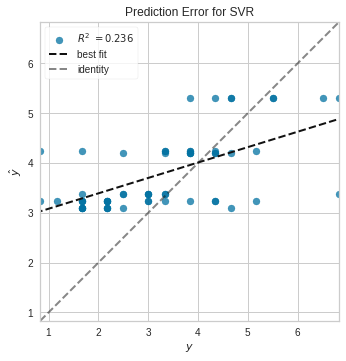

In [30]:
from sklearn.svm import SVR

SVR = SVR()
SVR.fit(X_train, y_train)
y_pred_SVR = SVR.predict(X_test)

SVR_RMSE = np.math.sqrt(mean_squared_error(y_test, y_pred_SVR))
SVR_MAE = mean_absolute_error(y_test, y_pred_SVR)
SVR_MAPE = mean_absolute_percentage_error(y_test, y_pred_SVR)
SVR_ME = max_error(y_test, y_pred_SVR)
print("RMSE = " + str(SVR_RMSE))
print("MAE = " + str(SVR_MAE))
print("MAPE = " + str(SVR_MAPE))
print("Max error = " + str(SVR_ME))
print("")

figure(figsize=(18, 6), dpi=80)
plt.title(label="SVR Model")
plt.xlabel("Day")
plt.ylabel("Daily average dose rate (micro Sv/hr)")
plt.plot(range(0,y_pred_SVR.size), y_pred_SVR, color='b', label="Predicted") 
plt.plot(range(0,y_test.size), y_test, color='r', label="Measured")
plt.legend(loc="upper right")
plt.show()
print("")

SVR_res_plt = ResidualsPlot(SVR, train_alpha=0.5, test_alpha=0.8, 
                         train_color="g", test_color="b", is_fitted =True)
SVR_res_plt.fit(X_train, y_train)
SVR_res_plt.score(X_test, y_test)
SVR_res_plt.show()
SVR_train_r2score = SVR_res_plt.train_score_
SVR_test_r2score = SVR_res_plt.test_score_
SVR_r2score_diff = SVR_train_r2score-SVR_test_r2score

print("")

SVR_QQ_plt = ResidualsPlot(SVR, train_alpha=0.5, test_alpha=0.8, 
                         train_color="g", test_color="b", is_fitted =True, hist=False, qqplot=True)
SVR_QQ_plt.fit(X_train, y_train)
SVR_QQ_plt.score(X_test, y_test)
SVR_QQ_plt.show()

print("")

SVR_error_plt = prediction_error(SVR, X_train, y_train, X_test, y_test, is_fitted =True)

fit_comp['SVR']=[SVR_train_r2score, SVR_test_r2score, SVR_r2score_diff]

model_comp['SVR']=[SVR_RMSE, SVR_MAE, SVR_MAPE, SVR_ME]

In [31]:
model_comp = pd.DataFrame.from_dict(model_comp).T
model_comp.columns = ['RMSE', 'MAE', 'MAPE', 'Max error']
model_comp = model_comp.sort_values('MAPE',ascending=True)
(model_comp.round(3)).style.background_gradient(cmap='Blues')

,RMSE,MAE,MAPE,Max error
GBR,1.106000,0.874000,0.355000,3.266000
LR,1.188000,0.974000,0.390000,3.911000
RF,1.312000,1.075000,0.447000,3.824000
KNN,1.312000,1.025000,0.454000,4.083000
SVR,1.260000,1.008000,0.482000,3.450000
DT,1.898000,1.524000,0.589000,4.333000


In [32]:
fit_comp = pd.DataFrame.from_dict(fit_comp).T
fit_comp.columns = ['train r2', 'test r2', 'r2 diff']
fit_comp = fit_comp.sort_values('test r2', ascending=False)
fit_comp.style.background_gradient(cmap='Blues')

,train r2,test r2,r2 diff
GBR,0.687166,0.411213,0.275954
LR,0.446313,0.320855,0.125459
SVR,0.252031,0.235744,0.016288
RF,0.843133,0.171658,0.671475
KNN,0.433419,0.171470,0.261949
DT,0.870614,-0.733613,1.604228


<ipython-input-33-ec5dcc83f99e>:29: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  ax.plot([0,7],[0,7], 'k--', color='r')


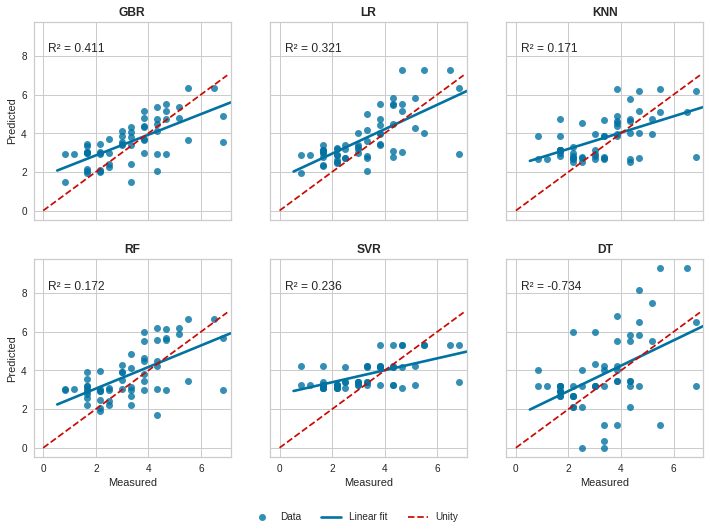

In [33]:
fig, axs = plt.subplots(2, 3, figsize=(12, 8), sharex=True, sharey=True)

sns.regplot(x=y_test, y=y_pred_GBR, ax = axs[0, 0], ci = None, truncate = False)
axs[0, 0].set_title('GBR', fontweight="bold")
axs[0, 0].text(0.2, 8.2, f'R\N{SUPERSCRIPT TWO} = {GBR_test_r2score:,.3f}')

sns.regplot(x=y_test, y=y_pred_LR, ax = axs[0, 1], ci = None, truncate = False)
axs[0, 1].set_title('LR', fontweight="bold")
axs[0, 1].text(0.2, 8.2, f'R\N{SUPERSCRIPT TWO} = {LR_test_r2score:,.3f}')

sns.regplot(x=y_test, y=y_pred_KNN, ax = axs[0, 2], ci = None, truncate = False)
axs[0, 2].set_title('KNN', fontweight="bold")
axs[0, 2].text(0.2, 8.2, f'R\N{SUPERSCRIPT TWO} = {KNN_test_r2score:,.3f}')

sns.regplot(x=y_test, y=y_pred_RF, ax = axs[1, 0], ci = None, truncate = False)
axs[1, 0].set_title('RF', fontweight="bold")
axs[1, 0].text(0.2, 8.2, f'R\N{SUPERSCRIPT TWO} = {RF_test_r2score:,.3f}')

sns.regplot(x=y_test, y=y_pred_SVR, ax = axs[1, 1], ci = None, truncate = False)
axs[1, 1].set_title('SVR', fontweight="bold")
axs[1, 1].text(0.2, 8.2, f'R\N{SUPERSCRIPT TWO} = {SVR_test_r2score:,.3f}')

sns.regplot(x=y_test, y=y_pred_DT, ax = axs[1, 2], ci = None, truncate = False)
axs[1, 2].set_title('DT', fontweight="bold")
axs[1, 2].text(0.2, 8.2, f'R\N{SUPERSCRIPT TWO} = {DT_test_r2score:,.3f}')

for ax in axs.flat:
    ax.set(xlabel='Measured', ylabel='Predicted')
    ax.plot([0,7],[0,7], 'k--', color='r')
    ax.label_outer()

fig.legend(labels=["Data", "Linear fit", "Unity"], loc="lower center", ncol=3)